## Artificial Intelligence: Sokoban solver

Author: Alexandru Sima (332CA)


### Prerequisites


#### Imports


In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from search_methods.beam_search import BeamSearch
from search_methods.lrtastar import LRTAstar
from search_methods.solution import Solution
from search_methods.solver import Solver
from search_methods.utils import get_neighbours_no_pulls
from sokoban.map import Map

import search_methods.heuristics as heuristics

#### Test levels


In [3]:
tests = [
    "easy_map1",
    "easy_map2",
    "medium_map1",
    "medium_map2",
    "large_map1",
    "large_map2",
    "hard_map1",
    "hard_map2",
    # "super_hard_map1",
]

test_names = [t.replace("_map", " ").replace("_", " ").capitalize() for t in tests]

#### Test runner


In [4]:
def run_tests(
    tests: list[str],
    beam_search_solver: BeamSearch | None,
    astar_solver: LRTAstar | None,
) -> tuple[list[Solution], list[Solution]]:
    """Run tests for the given solvers on the specified maps."""
    beam_search_solutions = []
    astar_solutions = []

    for test in tests:
        playmap = Map.from_yaml(f"tests/{test}.yaml")
        print(f"Running test: {test}")

        if beam_search_solver is not None:
            stats = beam_search_solver.solve(playmap)
            beam_search_solutions.append(stats)
            print("\tBeam Search Solution:")
            print("\t\t" + str(stats))

        if astar_solver is not None:
            stats = astar_solver.solve(playmap)
            astar_solutions.append(stats)
            print("\tA* Solution:")
            print("\t\t" + str(stats))

        playmap.plot_map()

    return beam_search_solutions, astar_solutions

#### Plotting


In [5]:
def bar_plot(
    title: str,
    inputs: list[str],
    values: list[float],
    xlabel: str,
    ylabel: str,
    width=0.4,
):
    _, ax = plt.subplots()
    ax.bar(inputs, values, width=width)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(inputs)

    ax.set_title(title)

    plt.tight_layout()
    plt.show()

In [6]:
def bar_group_plot(
    title: str,
    tests: list[str],
    beam_search_values: list[float],
    astar_values: list[float],
    ylabel: str,
    fmt="%.2f",
    width=0.4,
):
    """Create a bar plot with two bars (beam search and a* results) for each test."""

    x = np.arange(len(tests))

    _, ax = plt.subplots()
    bar1 = ax.bar(x - width / 2, beam_search_values, width, label="Beam Search")
    bar2 = ax.bar(x + width / 2, astar_values, width, label="A*")

    ax.bar_label(bar1, fmt=fmt)
    ax.bar_label(bar2, fmt=fmt)

    ax.tick_params(axis="x", labelsize=9)
    ax.set_xticks(x, tests)
    ax.set_ylabel(ylabel)

    ax.set_title(title)
    ax.legend()

    plt.tight_layout()
    plt.show()

#### Stats


##### Time taken


In [7]:
def plot_solved_tests(
    beam_search_solutions: list[Solution], astar_solutions: list[Solution]
):
    solved_beam_search = sum([1 if s.is_solved() else 0 for s in beam_search_solutions])
    solved_astar = sum([1 if s.is_solved() else 0 for s in astar_solutions])

    bar_plot(
        "Solved tests by algorithm",
        ["Beam Search", "A*"],
        [solved_beam_search, solved_astar],
        "algorithm",
        "number of solved tests",
    )

##### Maps solved


In [8]:
def plot_time(
    tests: list[str],
    beam_search_solutions: list[Solution],
    astar_solutions: list[Solution],
):
    bar_group_plot(
        "Time taken by each algorithm",
        tests,
        [s.time for s in beam_search_solutions],
        [s.time for s in astar_solutions],
        "time (s)",
    )

##### Expanded states


In [9]:
def plot_expanded_states(
    tests: list[str],
    beam_search_solutions: list[Solution],
    astar_solutions: list[Solution],
):
    bar_group_plot(
        "Total number of explored states by each algorithm",
        tests,
        [s.explored_states for s in beam_search_solutions],
        [s.explored_states for s in astar_solutions],
        "explored states",
        fmt="%d",
    )

##### Solution length


In [10]:
def plot_solution_length(
    tests: list[str],
    beam_search_solutions: list[Solution],
    astar_solutions: list[Solution],
):
    bar_group_plot(
        "Length of the solution given by each algorithm",
        tests,
        [len(s.steps) for s in beam_search_solutions],
        [len(s.steps) for s in astar_solutions],
        "solution length",
        fmt="%d",
    )

##### Test summary


In [11]:
def plot_stats(
    tests: list[str],
    beam_search_solutions: list[Solution],
    astar_solutions: list[Solution],
):
    plot_solved_tests(beam_search_solutions, astar_solutions)
    plot_time(tests, beam_search_solutions, astar_solutions)
    plot_expanded_states(tests, beam_search_solutions, astar_solutions)
    plot_solution_length(tests, beam_search_solutions, astar_solutions)

## Heuristics


### Boxes step distance


Running test: easy_map1
	Beam Search Solution:
		steps: 20, solved: True, explored states: 942, time: 0.23s, pull moves: 0
44
40
36
26
	A* Solution:
		steps: 26, solved: True, explored states: 18207, time: 1.57s, pull moves: 0, restarts: 367


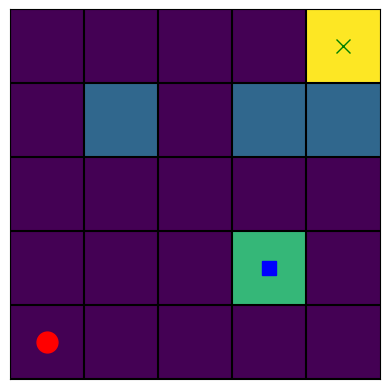

Running test: easy_map2
	Beam Search Solution:
		steps: 10, solved: True, explored states: 303, time: 0.06s, pull moves: 0
52
48
18
12
10
	A* Solution:
		steps: 10, solved: True, explored states: 24627, time: 2.19s, pull moves: 0, restarts: 533


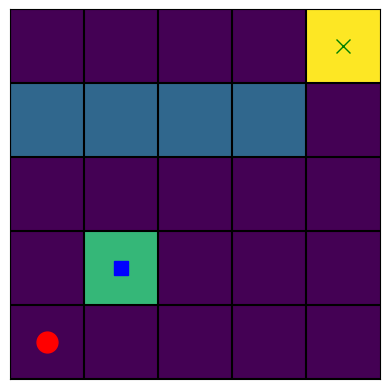

Running test: medium_map1
	Beam Search Solution:
		steps: 22, solved: True, explored states: 1187, time: 0.49s, pull moves: 0
48
42
40
	A* Solution:
		steps: 40, solved: True, explored states: 23857, time: 3.46s, pull moves: 0, restarts: 421


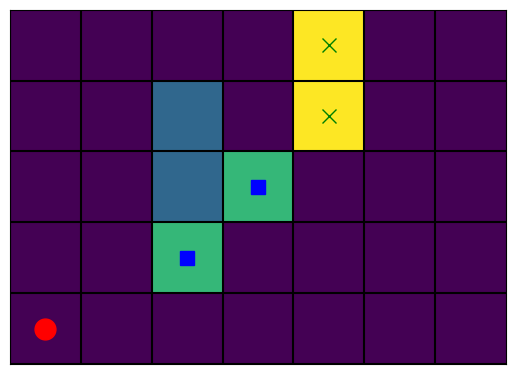

Running test: medium_map2
	Beam Search Solution:
		steps: 33, solved: True, explored states: 2113, time: 0.99s, pull moves: 0
99
	A* Solution:
		steps: 99, solved: True, explored states: 17079, time: 2.66s, pull moves: 0, restarts: 322


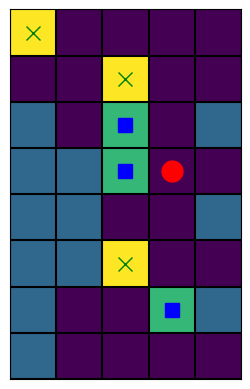

Running test: large_map1
	Beam Search Solution:
		steps: 30, solved: True, explored states: 1592, time: 1.10s, pull moves: 0
141
112
110
	A* Solution:
		steps: 110, solved: True, explored states: 10777, time: 2.86s, pull moves: 0, restarts: 168


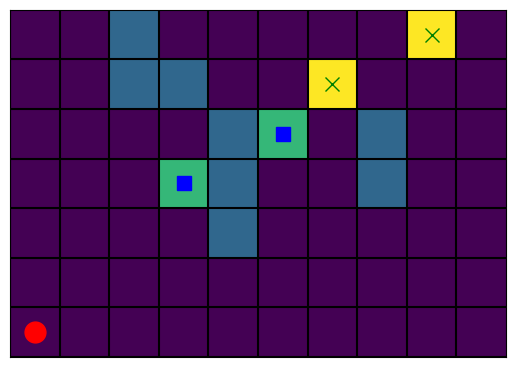

Running test: large_map2
	Beam Search Solution:
		steps: 47, solved: True, explored states: 3153, time: 3.82s, pull moves: 0
197
162
105
	A* Solution:
		steps: 105, solved: True, explored states: 20641, time: 14.17s, pull moves: 0, restarts: 248


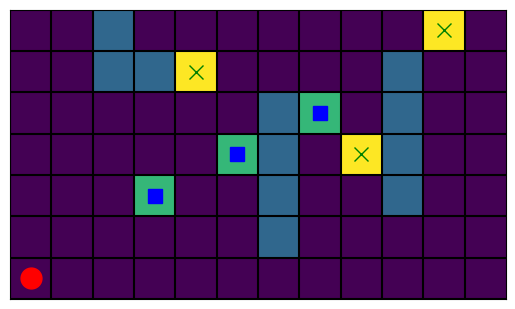

Running test: hard_map1
	Beam Search Solution:
		steps: 34, solved: True, explored states: 2250, time: 0.89s, pull moves: 0
59
50
40
	A* Solution:
		steps: 40, solved: True, explored states: 29685, time: 5.06s, pull moves: 0, restarts: 555


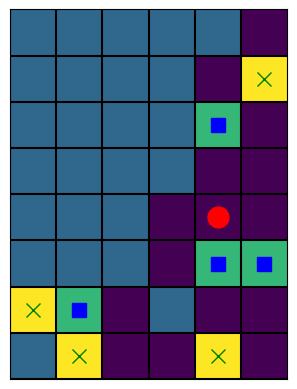

Running test: hard_map2
	Beam Search Solution:
		steps: 39, solved: True, explored states: 2468, time: 0.89s, pull moves: 0
80
72
70
	A* Solution:
		steps: 70, solved: True, explored states: 18469, time: 2.78s, pull moves: 0, restarts: 310


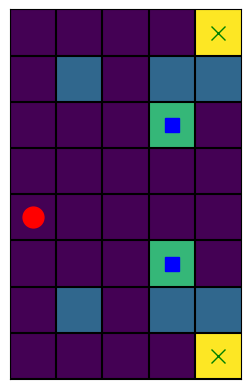

In [16]:
base_solver = Solver(
    heuristics.boxes_total_distance, get_neighbours_no_pulls, max_iters=200
)
beam_search_solver = BeamSearch(base_solver, k=80)
astar_solver = LRTAstar(
    base_solver, max_restarts=500, steps_before_restart=50, enhancement_retries=100
)

beam_search_solutions, astar_solutions = run_tests(
    tests, beam_search_solver, astar_solver
)

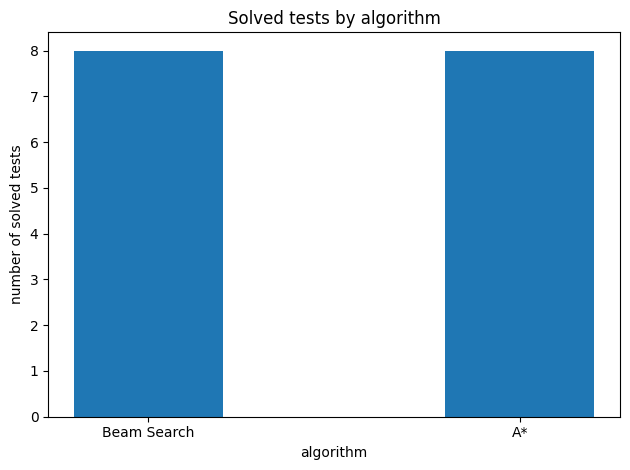

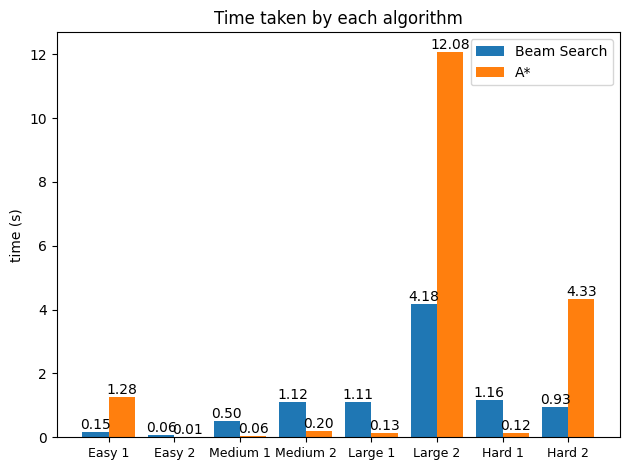

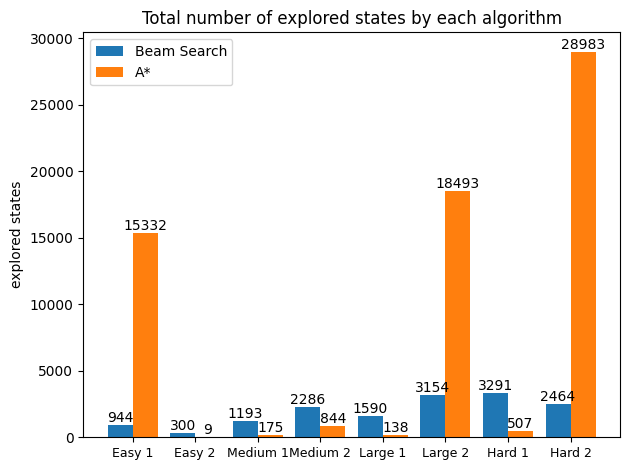

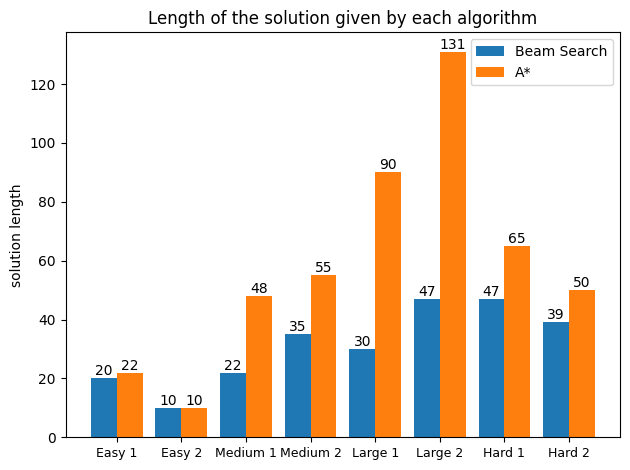

In [15]:
plot_stats(test_names, beam_search_solutions, astar_solutions)